In [8]:
from pyforest import *
from sklearn.preprocessing import Normalizer, normalize
from sklearn.metrics.pairwise import cosine_similarity
import math

In [2]:
driver_df = pd.read_csv('data_1024.csv', delimiter = '\t')

In [3]:
driver_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
driver_df = driver_df.drop('Driver_ID', axis=1)

In [5]:
driver_df = driver_df.astype('float32')

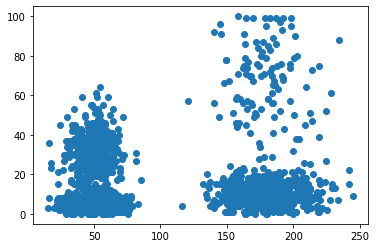

In [7]:
plt.scatter(driver_df['Distance_Feature'], driver_df['Speeding_Feature'])

In [16]:
def cosine_similarity_manual(d1, d2):
    x1 = d1[0]
    y1 = d1[1]
    
    x2 = d2[0]
    y2 = d2[1]
    
    magnitude = math.sqrt(x1 * x1 + y1 * y1) * math.sqrt(x2 * x2 + y2 * y2)
    
    dot_product = x1 * x2 + y1 * y2
    
    return dot_product / magnitude

In [17]:
d1 = driver_df.iloc[0]
d2 = driver_df.iloc[1]
d3 = driver_df.iloc[8]

In [18]:
cosine_similarity_manual(d1, d2)

0.9975714725306971

In [19]:
cosine_similarity(d1.values.reshape(1, -1), d2.values.reshape(1, -1))

array([[0.99757147]], dtype=float32)

### Normalization

In [20]:
normalized_df = pd.DataFrame(normalize(driver_df, norm = 'l2'), columns  = driver_df.columns)

In [21]:
normalized_df.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437


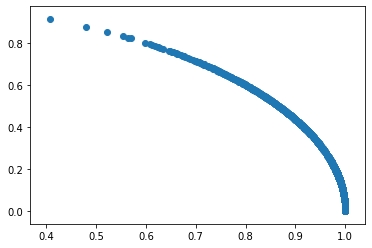

In [22]:
# Normalized plot
plt.scatter(normalized_df['Distance_Feature'], normalized_df['Speeding_Feature'])

In [33]:
def cosine_similarity_manual_normalized(d1, d2):
    
    x1 = d1[0]
    y1 = d1[1]
    
    x2 = d2[0]
    y2 = d2[1]
    
    magnitude = 1
    
    dot_product = x1 * x2 + y1 * y2
    
    return dot_product / magnitude

In [34]:
d1 = normalized_df.iloc[0]
d2 = normalized_df.iloc[1]
d3 = normalized_df.iloc[8]

In [35]:
cosine_similarity_manual_normalized(d1, d2)

0.9975714683532715

In [40]:
normalizer = Normalizer(copy = True, norm= 'max')
normalized_array = normalizer.fit_transform(driver_df)

In [41]:
normalized_df = pd.DataFrame(normalized_array, columns = driver_df.columns)
normalized_df

,Distance_Feature,Speeding_Feature
0,1.0,0.393038
1,1.0,0.475919
2,1.0,0.418345
3,1.0,0.395044
4,1.0,0.458043
...,...,...
3995,1.0,0.062484
3996,1.0,0.028382
3997,1.0,0.070212
3998,1.0,0.028387
